In [4]:
!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |████████████████████████████████| 169.1 MB 69 kB/s 
     |████████████████████████████████| 13.3 MB 4.1 MB/s 
     |████████████████████████████████| 1.9 MB 68.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.11.0+cu113
    Uninstalling torchaudio-0.11.0+cu113:
      Successfully uninstalled torchaudio-0.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires 

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-184-g9d8ed37 torch 1.11.0+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.8/107.7 GB disk)


In [71]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
import math

In [ ]:
dectionModel = torch.hub.load('ultralytics/yolov5', 'custom', path = "/content/last.pt", force_reload= True)

In [6]:
classificationModel = tf.keras.models.load_model("/content/signClassification.h5")

In [55]:
img = "/content/images/00212.jpg"

In [24]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

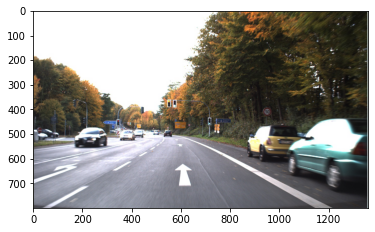

In [64]:
%matplotlib inline
i = plt.imread(img)
plt.imshow(i)

In [57]:
result = dectionModel(img)

In [58]:
param = result.pandas().xyxy[0]

In [59]:
param

,xmin,ymin,xmax,ymax,confidence,class,name
0,926.415405,383.147949,972.686340,434.996307,0.871057,0,trafficSign
1,62.149529,420.424835,101.571953,465.755402,0.616927,0,trafficSign


In [51]:
result.print()

image 1/1: 800x1360 2 trafficSigns
Speed: 32.8ms pre-process, 216.6ms inference, 1.2ms NMS per image at shape (1, 3, 384, 640)


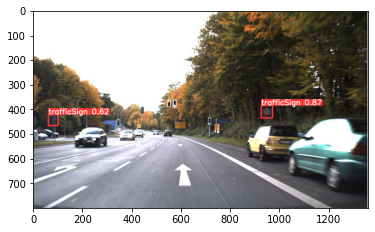

In [65]:
plt.imshow(np.squeeze(result.render()))

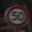

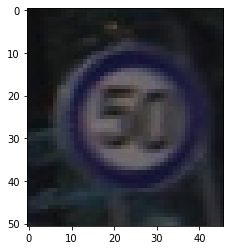

In [98]:
res = cv2.imread(img)

# res[y1:y2, x1: x2] 
sin1 = res[int(param.ymin[0]): math.floor(param.ymax[0]), int(param.xmin[0]):int(param.xmax[0])] 
plt.imshow(sin1)
dim = (32, 32)
sin1 = cv2.resize(sin1,dim, interpolation = cv2.INTER_AREA)
cv2_imshow(sin1)
# plt.imshow(sin1)

In [99]:
sin1 = sin1.astype("float") / 255.0
sin2 = np.array([sin1])
result1 = classificationModel.predict(sin2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
final = np.argmax(result1)
final = classNames[final]
final

'Dangerous curve to the left'

In [100]:
image = cv2.rectangle(res, (int(param.xmin[0]),int(param.ymin[0])), (int(param.xmax[0]),math.floor(param.ymax[0])), (255,0,0), 2)

In [104]:
image = cv2.putText(image, final,(int(param.xmin[0]),int(param.ymin[0])),cv2.FONT_HERSHEY_SIMPLEX,1,(255, 0, 0),1, cv2.LINE_AA)

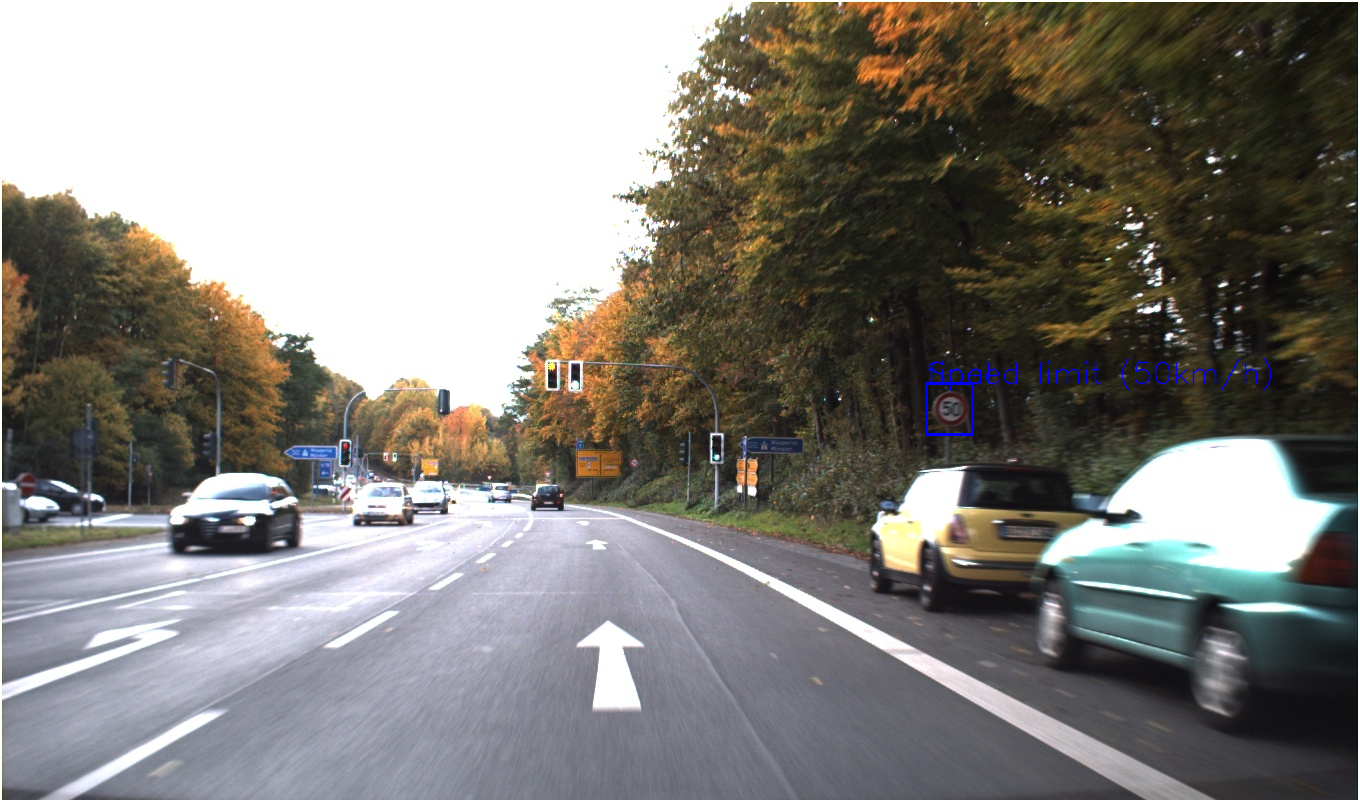

In [105]:
cv2_imshow(image)